In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:

df1 = pd.read_csv('datatraining.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)

df2= pd.read_csv('datatest.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)

df3= pd.read_csv('datatest2.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)

df4= pd.merge(df2, df1, how='outer')

df_m=pd.merge(df4, df3, how='outer')
df = df_m.set_index(['date'])
df_m


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1


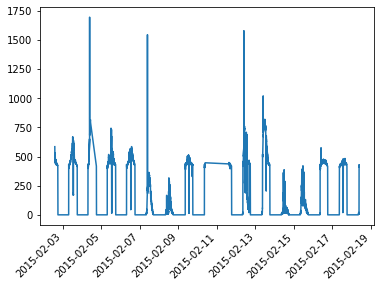

In [3]:
ts = df['Light']
plt.plot(ts)
plt.xticks(rotation=45, ha='right')
plt.show()

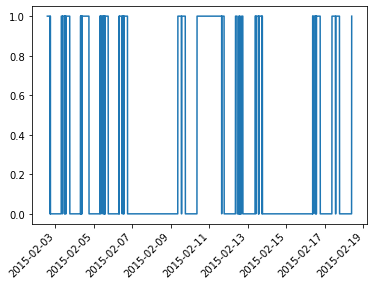

In [4]:
ts = df['Occupancy']
plt.plot(ts)
plt.xticks(rotation=45, ha='right')
plt.show()

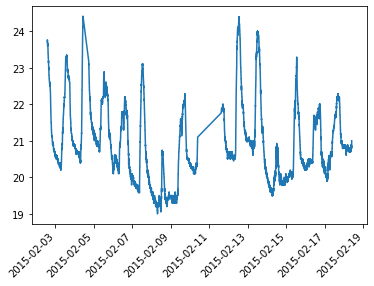

In [5]:
ts = df['Temperature']
plt.plot(ts)
plt.xticks(rotation=45, ha='right')
plt.show()

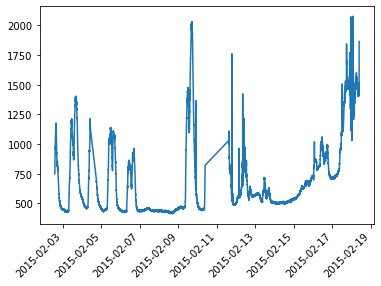

In [6]:
ts = df['CO2']
plt.plot(ts)
plt.xticks(rotation=45, ha='right')
plt.show()

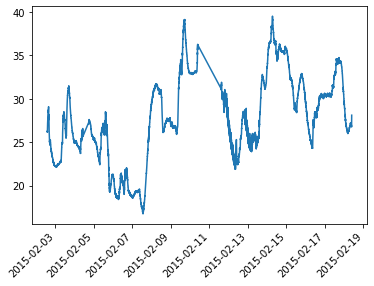

In [7]:
ts = df['Humidity']
plt.plot(ts)
plt.xticks(rotation=45, ha='right')
plt.show()

vogliamo plottare gli orari di un giorno feriale e uno festivo per vedere l'orario lavorativo e per avere la conferma che il weekend non si lavora

In [3]:
index1 = np.random.choice( df.index,10280, replace=False)
index2 = np.random.choice( df.index,10280, replace=False)

In [4]:
df_h=df.drop(index=index1, axis=0)
df_h2=df.drop(index=index2, axis=0)


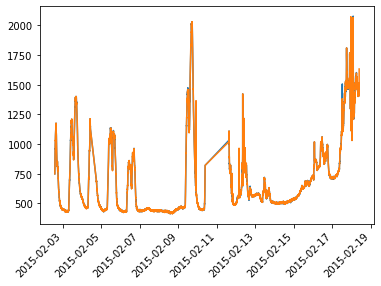

In [5]:
ts1 = df_h['CO2']
ts2 = df_h2['CO2']
plt.plot(ts1)
plt.plot(ts2)
plt.xticks(rotation=45, ha='right')
plt.show()

In [6]:
from scipy.spatial.distance import euclidean,cityblock

In [9]:
man_dist = cityblock(ts1, ts2)
euc_dist = euclidean(ts1, ts2)

print(man_dist,euc_dist)

564200.7297619047 12039.777433685264


## Transformation

#### offset translation

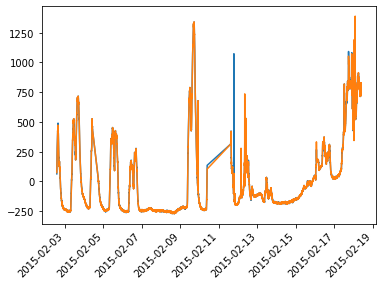

In [13]:
plt.plot(ts1 - ts1.mean())
plt.plot(ts2 - ts2.mean())
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
ts1_t=ts1 - ts1.mean()
ts2_t=ts2 - ts2.mean()

man_dist = cityblock(ts1_t, ts2_t)
euc_dist = euclidean(ts1_t, ts2_t)

print(man_dist,euc_dist)

469104.3113157758 10051.63426378116


#### Amplitude scaling

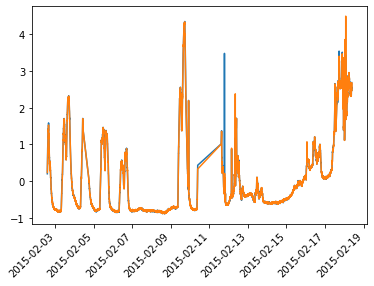

In [15]:
plt.plot((ts1 - ts1.mean())/ts1.std())
plt.plot((ts2 - ts2.mean())/ts2.std())
plt.xticks(rotation=45, ha='right')
plt.show()

In [16]:
ts1_t=(ts1 - ts1.mean())/ts1.std()
ts2_t=(ts2 - ts2.mean())/ts2.std()

In [17]:
man_dist = cityblock(ts1_t, ts2_t)
euc_dist = euclidean(ts1_t, ts2_t)

print(man_dist,euc_dist)

1519.0205257703408 32.52469785201731


#### Trend removel (inutile)

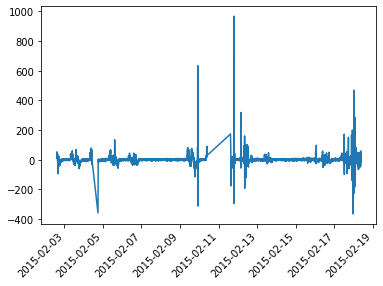

In [18]:
ts_shift = ts1 - ts1.rolling(window=7).mean()
plt.plot(ts_shift)
plt.xticks(rotation=45, ha='right')
plt.show()

#### Noise

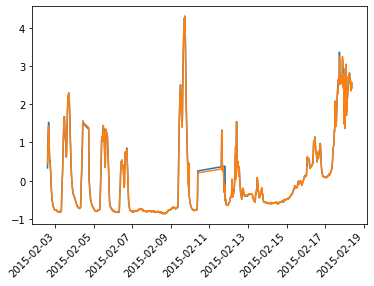

In [19]:
w = 10
plt.plot(((ts1 - ts1.mean())/ts1.std()).rolling(window=w).mean())
plt.plot(((ts2 - ts2.mean())/ts2.std()).rolling(window=w).mean())
plt.xticks(rotation=45, ha='right')
plt.show()

### DTW

In [13]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [14]:
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

In [15]:
ts=df['CO2']
ts1=df_h['CO2']
dist = dtw(ts, ts1)
dist

1996.7726484385328

In [50]:
dist = dtw(ts[:8], ts1[:8])
dist

37.42803836104121

In [51]:
path, dist = dtw_path(ts[:8], ts1[:8])

In [52]:
path

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 1),
 (4, 1),
 (5, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (7, 7)]

In [53]:
from scipy.spatial.distance import cdist

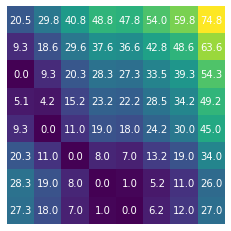

In [54]:
mat = cdist(ts.values[:8].reshape(-1,1), ts1.values[:8].reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

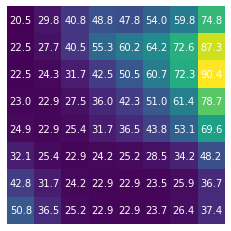

In [55]:
acc = subsequence_cost_matrix(ts.values[:8].reshape(-1,1), ts1.values[:8].reshape(-1,1))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")
        
plt.show()

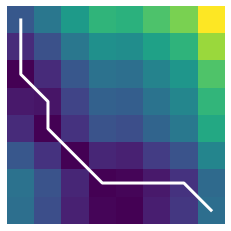

In [56]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [57]:
path, dist = dtw_path(ts[:8], ts1[:8], global_constraint="itakura", itakura_max_slope=2.)#metto un vincolo globale per restringere i path ammissibili
dist

46.85678238585703

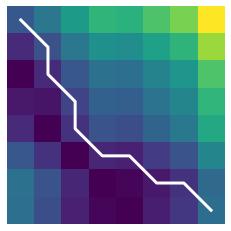

In [58]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [59]:
path, dist = dtw_path(ts[:10], ts1[:10], global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
dist

74.7894247574854

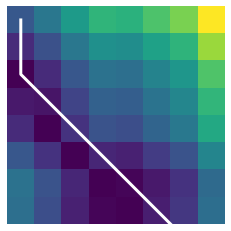

In [60]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [61]:
cdist_dtw([ ts,ts1])#Cross similarity matrix between time series datasets

array([[  0.        , 943.68056373],
       [943.68056373,   0.        ]])

valuto dtw con diverse distanze (absolute e square) e con metodo fast

In [62]:
from pyts.metrics import dtw as dtw2

In [63]:
dtw2(ts[:8].ravel(), ts1[:8].ravel())#distanza di defoult è square

37.42803836104121

In [64]:
dtw2(ts[:8].ravel(), ts1[:8].ravel(), dist='precomputed',precomputed_cost=mat) #sperando che mat sia la matrice dei costi

78.18333333333396

In [ ]:
dtw2(ts[:8].ravel(), ts1[:8].ravel(), dist='absolute')

In [66]:
dtw2(ts[:8].ravel(), ts1[:8].ravel(), method='fast')#dist=square

55.38132707771536

In [67]:
dtw2(ts[:8].ravel(), ts1[:8].ravel(), dist='absolute', method='fast')

151.85000000000002

miglior param è dist=square, con metodo fast non migliora

### compression based dissimilarity


Use as features whatever structure a
given compression algorithm finds

In [7]:
import zlib
import string

In [8]:
def CDM(x, y):
    return len(zlib.compress(x + y)) / (len(zlib.compress(x)) + len(zlib.compress(y)))

Time series can be compressed using
various transformations:


• Discrete Fourier Transformation


• Piecewise Linear Approximation


• Haar Wavelet


• Adaptive Piecewise Constant Approximation


• Symbolic Aggregate Approximation



In [21]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

In [22]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts)
ts1 = scaler.fit_transform(ts1)
ts2 = scaler.fit_transform(ts2)

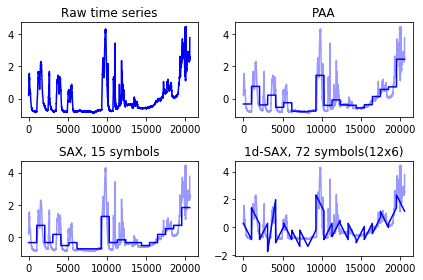

In [25]:
# TRASFORMO LA TIME SERIE df['CO2']


# PAA transform (and inverse transform) of the data
n_paa_segments = 20
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(ts)
paa_dataset_inv = paa.inverse_transform(ts_paa)

# SAX transform
n_sax_symbols = 15
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_dataset_inv = sax.inverse_transform(ts_sax)

# 1d-SAX transform
n_sax_symbols_avg = 12
n_sax_symbols_slope = 6
one_d_sax = OneD_SymbolicAggregateApproximation(
    n_segments=n_paa_segments,
    alphabet_size_avg=n_sax_symbols_avg,
    alphabet_size_slope=n_sax_symbols_slope)

ts_sax1d = one_d_sax.fit_transform(ts)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(ts_sax1d)

plt.figure()
plt.subplot(2, 2, 1)  # First, raw time series
plt.plot(ts[0].ravel(), "b-")
plt.title("Raw time series")

plt.subplot(2, 2, 2)  # Second, PAA
plt.plot(ts[0].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv[0].ravel(), "b-")
plt.title("PAA")

plt.subplot(2, 2, 3)  # Then SAX
plt.plot(ts[0].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.subplot(2, 2, 4)  # Finally, 1d-SAX
plt.plot(ts[0].ravel(), "b-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv[0].ravel(), "b-")
plt.title("1d-SAX, %d symbols"
          "(%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                       n_sax_symbols_avg,
                       n_sax_symbols_slope))

plt.tight_layout()
plt.show()

Confronto le varie trasformazioni rispetto a ts1 e ts2

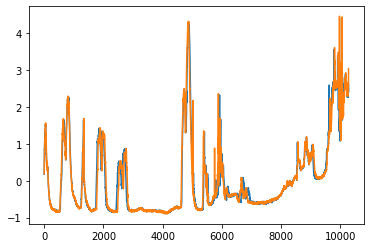

In [27]:
plt.plot(ts1[0].ravel())
plt.plot(ts2[0].ravel())
plt.show()

In [29]:
ts1_str = (' '.join([str(v) for v in ts1[0].ravel()])).encode('utf-8')
ts2_str = (' '.join([str(v) for v in ts2[0].ravel()])).encode('utf-8')

In [31]:
print("CDM_init = ", CDM(ts1, ts2))

CDM_init =  0.8660648251411667


PiecewiseAggregateApproximation

In [32]:
ts1_paa = paa.fit_transform(ts1)
ts2_paa = paa.fit_transform(ts2)

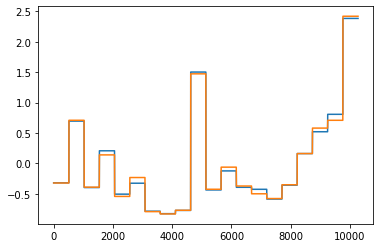

In [33]:
plt.plot(paa.inverse_transform(ts1_paa)[0].ravel())
plt.plot(paa.inverse_transform(ts2_paa)[0].ravel())
plt.show()

In [34]:
ts1_str = (' '.join([str(v) for v in ts1_paa[0].ravel()])).encode('utf-8')
ts2_str = (' '.join([str(v) for v in ts2_paa[0].ravel()])).encode('utf-8')


print("CDM = ", CDM(ts1_str, ts2_str))

CDM =  0.9520383693045563


SymbolicAggregateApproximation

In [35]:
ts1_sax = sax.fit_transform(ts1)
ts2_sax = sax.fit_transform(ts2)

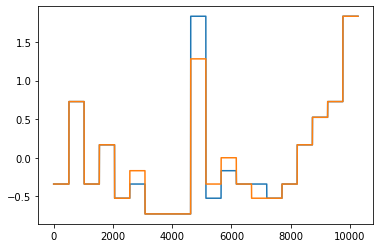

In [36]:
plt.plot(sax.inverse_transform(ts1_sax)[0].ravel())
plt.plot(sax.inverse_transform(ts2_sax)[0].ravel())
plt.show()

In [37]:
ts1_str = (' '.join([str(v) for v in ts1_sax[0].ravel()])).encode('utf-8')
ts2_str = (' '.join([str(v) for v in ts2_sax[0].ravel()])).encode('utf-8')


print("CDM = ", CDM(ts1_str, ts2_str))

CDM =  0.6708860759493671


 OneD_SymbolicAggregateApproximation

In [38]:
ts1_sax1d = one_d_sax.fit_transform(ts1)
ts2_sax1d = one_d_sax.fit_transform(ts2)

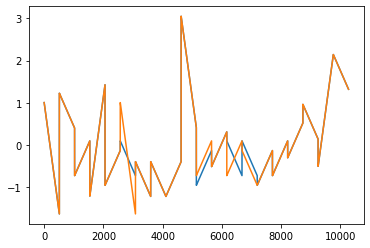

In [39]:
plt.plot(one_d_sax.inverse_transform(ts1_sax1d)[0].ravel())
plt.plot(one_d_sax.inverse_transform(ts2_sax1d)[0].ravel())
plt.show()

In [40]:
ts1_str = (' '.join([str(v) for v in ts1_sax1d[0].ravel()])).encode('utf-8')
ts2_str = (' '.join([str(v) for v in ts2_sax1d[0].ravel()])).encode('utf-8')


print("CDM = ", CDM(ts1_str, ts2_str))

CDM =  0.6238532110091743
